<B><U>Industrial Copper Modeling<B><U>

<B> Data Extraction <B>

These are the libraries which are necessary for the working this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_excel(r"F:\Capstone\Project 4\Copper_Set.xlsx",sheet_name="Result 1")

In [3]:
df.shape

(181673, 14)

In [4]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


<B> Feature Engineering <B>

Filtering the dataframe based on the status column values "Won" and "Lost"

In [5]:
df1 = df[df['status'].isin(['Won','Lost'])]

Resetting the index of the dataframe

In [6]:
df1 = df1.reset_index(drop=True)

Dropping the column "id" in the dataframe

In [7]:
df1 = df1.drop(['id'],axis=1)

Rounding off the values by decimal by 2

In [8]:
df1['quantity tons'] = df1['quantity tons'].round(2)

Creating the new values under the column "area" using multiplying width and thickness

In [9]:
df1['area'] = df1['width'] * df1['thickness']

In [10]:
df1.shape

(150448, 14)

In [11]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,area
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,3000.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,968.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,361.76
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,3029.10
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,1171.20
150444,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,1425.00
150445,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,887.50
150446,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,1062.50


<B> Data Cleaning <B>

Droping the rows of the particular columns which contains null values

In [12]:
df1 = df1.dropna(subset=['customer','application','item_date','delivery date','country'], axis=0)

Changing the values that start with 0000 to NaN in material reference column

In [13]:
df1.loc[:, 'material_ref'] = df1['material_ref'].str.replace(r'^0000.*', "NA", regex=True)

Filling the empty values to fill with NA

In [14]:
df1.loc[:, 'material_ref'] = df1['material_ref'].fillna('NA')

Creating the unique values from the dataframe which might be used in the streamlit select box

In [15]:
unique_values = {
    'item_date': df1['item_date'].unique().astype(int),
    'customer': df1['customer'].unique().astype(int),
    'country': df1['country'].unique().astype(int),
    'item type': df1['item type'].unique().astype(str),
    'application': df1['application'].unique().astype(int),
    'material_ref': df1['material_ref'].unique().astype(str),
    'product_ref': df1['product_ref'].unique().astype(str),
    'delivery date': df1['delivery date'].unique().astype(int)
}

Saving the unique values into a file using pickle module

In [16]:
# Save the unique values to a file
with open('unique_values.pkl', 'wb') as f:
    pickle.dump(unique_values, f) 

Filling the empty values to fill with mean values

In [17]:
df1.loc[:, 'selling_price'] = df1['selling_price'].fillna(df1['selling_price'].mean())

Found the object using the unique values and removing the object in the 'quantity tons' column

In [18]:
df1 = df1[df1['quantity tons'] != 'e']

In [19]:
df1.shape

(150440, 14)

Filtering the dataframe with the positive selling price and positive quantity tons

In [20]:
c_df = df1[(df1['selling_price'] > 10) & (df1['selling_price'] > 0) & (df1['quantity tons'] > 0)]

Resetting the index of the dataframe

In [21]:
c_df = c_df.reset_index(drop=True)

In [22]:
c_df.shape

(150431, 14)

<B>Handling Outliers<B>

Checking the description of the Dataframe

In [23]:
c_df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price,area
count,1.504310e+05,1.504310e+05,150431.000000,150431.000000,150431.000000,150431.000000,1.504310e+05,1.504310e+05,150431.000000,150431.000000
mean,2.020457e+07,3.023289e+07,45.391568,25.194807,2.601750,1297.838965,4.748346e+08,2.020729e+07,825.821520,3660.079049
std,4.553519e+03,1.056124e+05,24.488375,17.640519,3.028786,266.166770,7.172635e+08,4.427753e+03,290.770119,4859.948461
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,21.010000,2.400000
25%,2.020093e+07,3.019689e+07,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,2.020100e+07,671.000000,875.000000
50%,2.020120e+07,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,811.000000,1893.000000
75%,2.021020e+07,3.027982e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,951.035000,4425.000000
max,2.021040e+07,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,2.022010e+07,81236.140000,600000.000000


Checking the outliers of the selling price by plotting the box plot using seaborn

<Axes: ylabel='selling_price'>

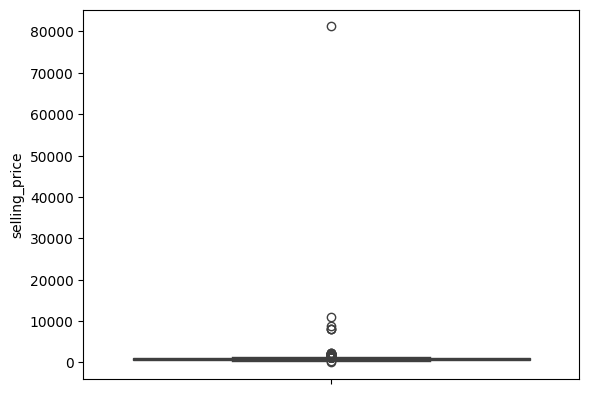

In [24]:
sns.boxplot(c_df['selling_price'])

Removing the Outliers using the Interquartile Range method

In [25]:
Q1 = c_df['selling_price'].quantile(0.25)
Q3 = c_df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

Filtering the Dataframe using the Upper and Lower bound

In [26]:
f_df = c_df[(c_df['selling_price'] >= lower_bound) & (c_df['selling_price'] <= upper_bound)]

In [27]:
f_df.shape

(149095, 14)

Checking the box plot again using seaborn

<Axes: ylabel='selling_price'>

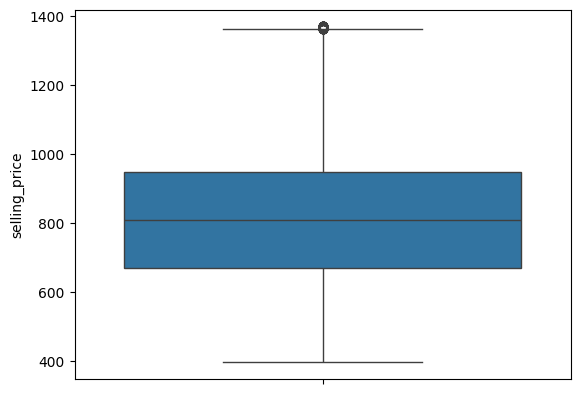

In [28]:
sns.boxplot(f_df['selling_price'])

Resetting the index of the dataframe

In [29]:
f_df = f_df.reset_index(drop=True)

<B>Filtering the Categorical and Numerical variables<B>

Finding the Information about the datatypes in the dataframe

In [30]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149095 entries, 0 to 149094
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      149095 non-null  float64
 1   quantity tons  149095 non-null  object 
 2   customer       149095 non-null  float64
 3   country        149095 non-null  float64
 4   status         149095 non-null  object 
 5   item type      149095 non-null  object 
 6   application    149095 non-null  float64
 7   thickness      149095 non-null  float64
 8   width          149095 non-null  float64
 9   material_ref   149095 non-null  object 
 10  product_ref    149095 non-null  int64  
 11  delivery date  149095 non-null  float64
 12  selling_price  149095 non-null  float64
 13  area           149095 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 15.9+ MB


Changing the Datatype of the "quantity tons" to float datatype

In [31]:
f_df['quantity tons'] = f_df['quantity tons'].astype(float)

Creating the new dataframe using the numerical variables of the old dataframe

In [32]:
num_df = f_df[['quantity tons','width','thickness','area','selling_price']]

In [33]:
num_df

,quantity tons,width,thickness,area,selling_price
0,54.151139,1500.0,2.00,3000.00,854.00
1,768.024839,1210.0,0.80,968.00,1047.00
2,386.127949,952.0,0.38,361.76,644.33
3,202.411065,1317.0,2.30,3029.10,768.00
4,785.526262,2000.0,4.00,8000.00,577.00
...,...,...,...,...,...
149090,106.783299,1240.0,0.96,1190.40,602.00
149091,102.482422,1220.0,0.96,1171.20,591.00
149092,208.086469,1500.0,0.95,1425.00,589.00
149093,4.235594,1250.0,0.71,887.50,619.00


Creating the new dataframe using the categorical variables of the old dataframe

In [34]:
category = f_df[['item_date','customer','country','item type','application','material_ref','product_ref','delivery date','status']]

In [35]:
category

,item_date,customer,country,item type,application,material_ref,product_ref,delivery date,status
0,20210401.0,30156308.0,28.0,W,10.0,DEQ1 S460MC,1670798778,20210701.0,Won
1,20210401.0,30202938.0,25.0,W,41.0,NA,1668701718,20210401.0,Won
2,20210401.0,30153963.0,30.0,WI,28.0,S0380700,628377,20210101.0,Won
3,20210401.0,30349574.0,32.0,S,59.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,Won
4,20210401.0,30211560.0,28.0,W,10.0,2_S275JR+AR-CL1,640665,20210301.0,Won
...,...,...,...,...,...,...,...,...,...
149090,20200702.0,30200854.0,25.0,W,41.0,NA,164141591,20200701.0,Won
149091,20200702.0,30200854.0,25.0,W,41.0,NA,164141591,20200701.0,Won
149092,20200702.0,30200854.0,25.0,W,41.0,NA,164141591,20200701.0,Won
149093,20200702.0,30200854.0,25.0,W,41.0,NA,164141591,20200701.0,Won


Changing the datatypes of the values in the column into string datatypes

In [36]:
cat_df = category.apply(lambda x: x.map(lambda y: str(int(y)) if isinstance(y, (int, float)) and y == int(y) else str(y)), axis=0)

In [37]:
cat_df

,item_date,customer,country,item type,application,material_ref,product_ref,delivery date,status
0,20210401,30156308,28,W,10,DEQ1 S460MC,1670798778,20210701,Won
1,20210401,30202938,25,W,41,NA,1668701718,20210401,Won
2,20210401,30153963,30,WI,28,S0380700,628377,20210101,Won
3,20210401,30349574,32,S,59,DX51D+ZM310MAO 2.3X1317,1668701718,20210101,Won
4,20210401,30211560,28,W,10,2_S275JR+AR-CL1,640665,20210301,Won
...,...,...,...,...,...,...,...,...,...
149090,20200702,30200854,25,W,41,NA,164141591,20200701,Won
149091,20200702,30200854,25,W,41,NA,164141591,20200701,Won
149092,20200702,30200854,25,W,41,NA,164141591,20200701,Won
149093,20200702,30200854,25,W,41,NA,164141591,20200701,Won


<B>Handling Skewness<B>

Importing the necessary libraries

In [38]:
from scipy.stats import skew

Finding the skew values for the numerical dataframe and plotting the graph using histogram graph

quantity tons
53.59435588329038


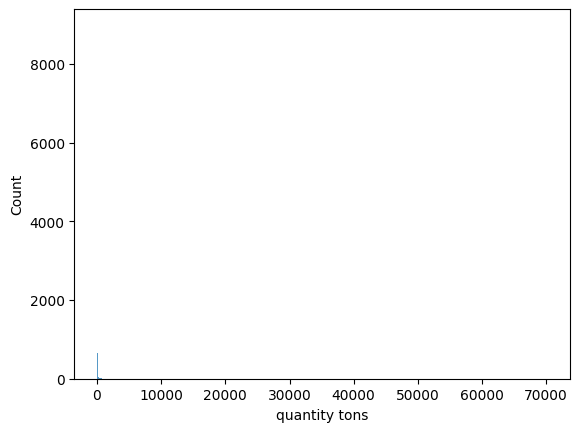

width
0.3861692966734426


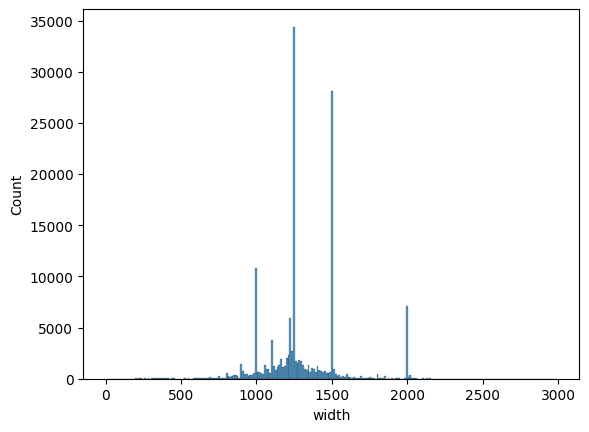

thickness
17.138724804860654


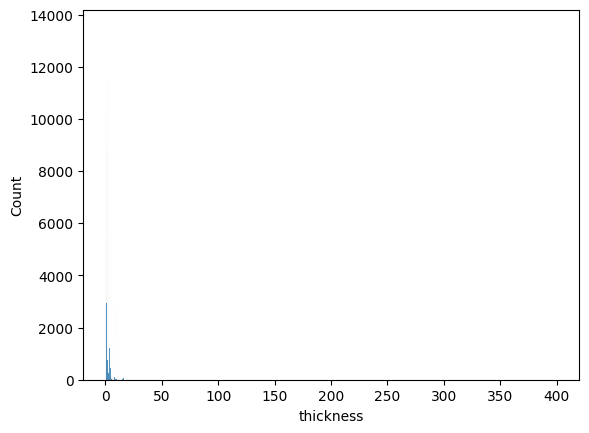

area
14.721282715459068


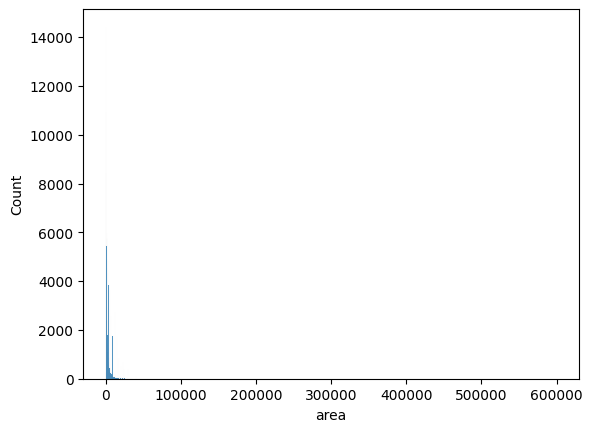

selling_price
0.3612201329329431


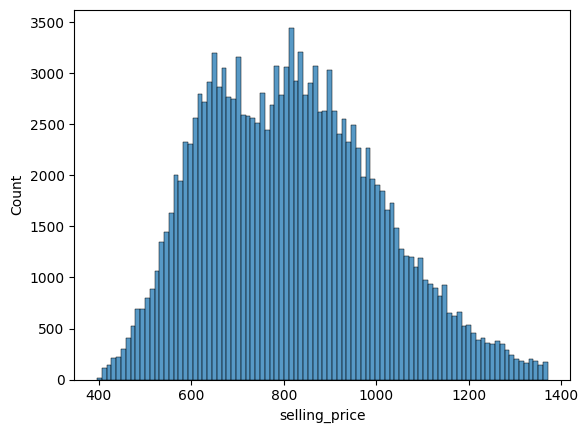

In [39]:
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col])
    plt.show()

The skew values of the column "quantity tons", "thickness" and "area" are positively skewed.

The skew value of the column "width" is fine.

Plotting the heatmap and showing the correlation between the each variable with the selling price

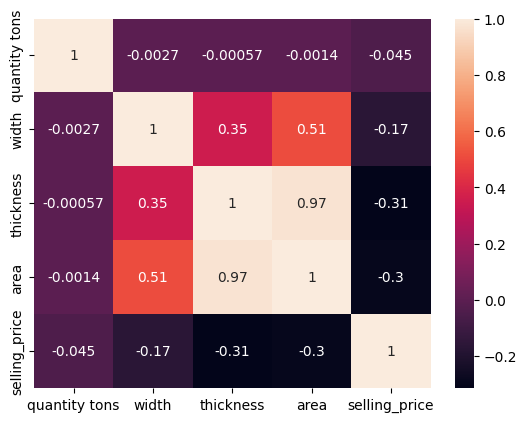

In [40]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

These are findings of the heat map.

Area (0.51): There is a moderate positive correlation between area and selling price. This means that as the area increases, the selling price tends to increase as well.

Quantity in Tons (-0.045): There is a very weak negative correlation here, suggesting that the selling price slightly decreases as the quantity in tons increases.

Width (-0.17): This shows a weak negative correlation, indicating that width has a small influence on the selling price.

Thickness (-0.31): There is a weak negative correlation between thickness and selling price, implying that thicker products tend to have a slightly lower selling price.

Using Log Transformation on qunatity tons, thickness and area column

In [41]:
num_df.loc[:, 'quantity tons'] = np.log(num_df['quantity tons'])
num_df.loc[:, 'thickness'] = np.log(num_df['thickness'])
num_df.loc[:, 'area'] = np.log(num_df['area'])

In [42]:
skew(num_df['quantity tons'])

np.float64(-0.045728395283993806)

In [43]:
skew(num_df['thickness'])

np.float64(0.3260070129438983)

In [44]:
skew(num_df['area'])

np.float64(0.38538309645534047)

<B> Encoding the categorical variables<B>

Encoded the categorical variables using the Label Encoding method

In [45]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149095 entries, 0 to 149094
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   item_date      149095 non-null  object
 1   customer       149095 non-null  object
 2   country        149095 non-null  object
 3   item type      149095 non-null  object
 4   application    149095 non-null  object
 5   material_ref   149095 non-null  object
 6   product_ref    149095 non-null  object
 7   delivery date  149095 non-null  object
 8   status         149095 non-null  object
dtypes: object(9)
memory usage: 10.2+ MB


Importing the necessary library

In [46]:
from sklearn.preprocessing import LabelEncoder

Creating a new dataframe for storing the encoded variables

In [47]:
encoded_df = pd.DataFrame(index=cat_df.index)

Encoding the each column of the dataframe and save them into the separate file using the pickle module

In [48]:
for col in cat_df:
    le = LabelEncoder()
    le.fit(cat_df[col])
    encoded_df[col] = le.transform(cat_df[col])
    with open(f'label_encoder_{col}.pkl', 'wb') as f:
        pickle.dump(le, f)

In [49]:
encoded_df

,item_date,customer,country,item type,application,material_ref,product_ref,delivery date,status
0,249,49,5,5,0,5050,13,18,1
1,249,284,2,5,16,8240,11,15,1
2,249,37,6,6,9,9099,27,12,1
3,249,918,7,3,21,5318,11,12,1
4,249,391,5,5,0,1807,30,14,1
...,...,...,...,...,...,...,...,...,...
149090,2,219,2,5,16,8240,2,6,1
149091,2,219,2,5,16,8240,2,6,1
149092,2,219,2,5,16,8240,2,6,1
149093,2,219,2,5,16,8240,2,6,1


Merging the two skewed and encoded dataframe

In [50]:
new_df = pd.concat([encoded_df,num_df],axis=1)

In [51]:
new_df

,item_date,customer,country,item type,application,material_ref,product_ref,delivery date,status,quantity tons,width,thickness,area,selling_price
0,249,49,5,5,0,5050,13,18,1,3.991779,1500.0,0.693147,8.006368,854.00
1,249,284,2,5,16,8240,11,15,1,6.643822,1210.0,-0.223144,6.875232,1047.00
2,249,37,6,6,9,9099,27,12,1,5.956169,952.0,-0.967584,5.890981,644.33
3,249,918,7,3,21,5318,11,12,1,5.310301,1317.0,0.832909,8.016021,768.00
4,249,391,5,5,0,1807,30,14,1,6.666354,2000.0,1.386294,8.987197,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149090,2,219,2,5,16,8240,2,6,1,4.670802,1240.0,-0.040822,7.082045,602.00
149091,2,219,2,5,16,8240,2,6,1,4.629691,1220.0,-0.040822,7.065784,591.00
149092,2,219,2,5,16,8240,2,6,1,5.337954,1500.0,-0.051293,7.261927,589.00
149093,2,219,2,5,16,8240,2,6,1,1.443523,1250.0,-0.342490,6.788409,619.00


<B> Scaling <B>

Scaled the dataframe using the MinMax Scaler

Importing the necessary library

In [52]:
from sklearn.preprocessing import MinMaxScaler

Creating a new dataframe for storing the scaled dataframe

In [53]:
final_df = pd.DataFrame(index=new_df.index)

Scaling the each column of the dataframe and save them into the separate file using the pickle module

In [54]:
for col in new_df:
    mx = MinMaxScaler()
    mx.fit(new_df[[col]])
    final_df[col] = mx.transform(new_df[[col]])
    with open(f'min_max_scaler_{col}.pkl', 'wb') as f:
        pickle.dump(mx, f)

In [55]:
final_df

,item_date,customer,country,item type,application,material_ref,product_ref,delivery date,status,quantity tons,width,thickness,area,selling_price
0,1.000000,0.043986,0.3125,0.833333,0.000000,0.468591,0.419355,0.750000,1.0,0.683847,0.501506,0.312466,0.573721,0.469744
1,1.000000,0.254937,0.1250,0.833333,0.551724,0.764591,0.354839,0.625000,1.0,0.800817,0.404483,0.193564,0.482715,0.667692
2,1.000000,0.033214,0.3750,1.000000,0.310345,0.844298,0.870968,0.500000,1.0,0.770488,0.318167,0.096962,0.403526,0.254697
3,1.000000,0.824057,0.4375,0.500000,0.724138,0.493458,0.354839,0.500000,1.0,0.742001,0.440281,0.330602,0.574497,0.381538
4,1.000000,0.350987,0.3125,0.833333,0.000000,0.167672,0.967742,0.583333,1.0,0.801811,0.668786,0.402412,0.652634,0.185641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149090,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,1.0,0.713796,0.414520,0.217223,0.499354,0.211282
149091,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,1.0,0.711982,0.407829,0.217223,0.498046,0.200000
149092,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,1.0,0.743221,0.501506,0.215864,0.513826,0.197949
149093,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,1.0,0.571454,0.417866,0.178077,0.475729,0.228718


<B>Creation of the Training Dataset<B>

Creating a new dataframe by the dropping the columns we need to predict

In [56]:
train_df = final_df.drop(['selling_price','status'],axis=1)

In [57]:
train_df

,item_date,customer,country,item type,application,material_ref,product_ref,delivery date,quantity tons,width,thickness,area
0,1.000000,0.043986,0.3125,0.833333,0.000000,0.468591,0.419355,0.750000,0.683847,0.501506,0.312466,0.573721
1,1.000000,0.254937,0.1250,0.833333,0.551724,0.764591,0.354839,0.625000,0.800817,0.404483,0.193564,0.482715
2,1.000000,0.033214,0.3750,1.000000,0.310345,0.844298,0.870968,0.500000,0.770488,0.318167,0.096962,0.403526
3,1.000000,0.824057,0.4375,0.500000,0.724138,0.493458,0.354839,0.500000,0.742001,0.440281,0.330602,0.574497
4,1.000000,0.350987,0.3125,0.833333,0.000000,0.167672,0.967742,0.583333,0.801811,0.668786,0.402412,0.652634
...,...,...,...,...,...,...,...,...,...,...,...,...
149090,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,0.713796,0.414520,0.217223,0.499354
149091,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,0.711982,0.407829,0.217223,0.498046
149092,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,0.743221,0.501506,0.215864,0.513826
149093,0.008032,0.196589,0.1250,0.833333,0.551724,0.764591,0.064516,0.250000,0.571454,0.417866,0.178077,0.475729


<B>Evaluating the Classification and Regression Model<B>

<B>  Machine Learning Classification Model <B>

We used the ExtraTreesClassifier, XGBClassifier and Logistic Regression to predict the Status 

In [58]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, encoded_df['status'], test_size=0.2, random_state=50)

# Train the models
etc = ExtraTreesClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()

etc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Evaluate the models
etc_predictions = etc.predict(X_test)
xgb_predictions = xgb.predict(X_test)
lr_predictions = lr.predict(X_test)

#Calculating the accuracy,precision,recall and f1 score
etc_accuracy = accuracy_score(y_test, etc_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

etc_precision = precision_score(y_test, etc_predictions, average='weighted', zero_division=0)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted',zero_division=0)
lr_precision = precision_score(y_test, lr_predictions,average='weighted',zero_division=0)

etc_recall = recall_score(y_test, etc_predictions, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted',zero_division=0)
lr_recall = recall_score(y_test, lr_predictions,average='weighted',zero_division=0)

etc_f1 = f1_score(y_test, etc_predictions, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted',zero_division=0)
lr_f1 = f1_score(y_test, lr_predictions,average='weighted',zero_division=0)

etc_auc = roc_auc_score(y_test, etc_predictions, multi_class='ovo',average='macro')
xgb_auc = roc_auc_score(y_test, xgb_predictions,multi_class='ovo',average='macro')
lr_auc = roc_auc_score(y_test, lr_predictions,multi_class='ovo',average='macro')

#Collecting the results
results = {
    "Model": ["ExtraTreesClassifier", "XGBClassifier", "Logistic Regression"],
    "Accuracy": [etc_accuracy, xgb_accuracy, lr_accuracy],
    "Precision": [etc_precision, xgb_precision, lr_precision],
    "Recall": [etc_recall, xgb_recall, lr_recall],
    "F1 score": [etc_f1, xgb_f1, lr_f1],
    "AUC curve": [etc_auc, xgb_auc, lr_auc]
}

#Convert the results to a dataframe
r_df = pd.DataFrame(results)

r_df

,Model,Accuracy,Precision,Recall,F1 score,AUC curve
0,ExtraTreesClassifier,0.967303,0.967208,0.967303,0.967249,0.952042
1,XGBClassifier,0.939368,0.938620,0.939368,0.938839,0.905676
2,Logistic Regression,0.807136,0.787692,0.807136,0.784355,0.645465


<B>Hypertuning the Parameters -  Grid Search with Cross Validation for Classification Model<B>

We used the same ExtraTreesClassifier, XGBClassifier and Logistic Regression by Hypertuning the parameters 

In [59]:
#Define necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models and hyperparameter spaces
models = {
    'Extra Trees': ExtraTreesClassifier(),
    'XGB': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}
param_grids = {
    'Extra Trees': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10]
    },
    'XGB': {
        'learning_rate': [0.1, 0.5],
        'max_depth': [3, 5]
    },
    'Logistic Regression': {
        'C': [0.1, 1],
        'penalty': ['l2']
    }
}

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'auc': 'roc_auc'
}

# Initialize results dictionary
results1 = {
    'Model': [],
    'Best Params': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': []
}

# Perform grid search with cross-validation
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='accuracy')
    grid_search.fit(X_train, y_train)

    # Append results to dictionary
    results1['Model'].append(model_name)
    results1['Best Params'].append(grid_search.best_params_)
    results1['Accuracy'].append(grid_search.best_score_)
    results1['Precision'].append(grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
    results1['Recall'].append(grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
    results1['F1'].append(grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
    results1['AUC'].append(grid_search.cv_results_['mean_test_auc'][grid_search.best_index_])

# Convert results to DataFrame
results1_df = pd.DataFrame(results1)

# Print results
results1_df

,Model,Best Params,Accuracy,Precision,Recall,F1,AUC
0,Extra Trees,"{'max_depth': 10, 'n_estimators': 100}",0.828792,0.827229,0.983215,0.898501,0.895062
1,XGB,"{'learning_rate': 0.5, 'max_depth': 5}",0.930866,0.947884,0.963265,0.955511,0.974137
2,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.805577,0.828426,0.943054,0.882031,0.813169


<B>  Machine Learning Regression Model <B>

We used the RandomForestRegressor, ExtraTreesRegressor and XGBRegressor to predict the Selling Price

In [60]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(train_df, num_df['selling_price'], test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
xgbr = XGBRegressor()

# Train models
rf.fit(A_train, B_train)
et.fit(A_train, B_train)
xgbr.fit(A_train, B_train)

# Make predictions
rf_pred = rf.predict(A_test)
et_pred = et.predict(A_test)
xgb_pred = xgbr.predict(A_test)

# Calculate scores
rf_mae = mean_absolute_error(B_test, rf_pred)
rf_mse = mean_squared_error(B_test, rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(B_test, rf_pred)

et_mae = mean_absolute_error(B_test, et_pred)
et_mse = mean_squared_error(B_test, et_pred)
et_rmse = et_mse ** 0.5
et_r2 = r2_score(B_test, et_pred)

xgb_mae = mean_absolute_error(B_test, xgb_pred)
xgb_mse = mean_squared_error(B_test, xgb_pred)
xgb_rmse = xgb_mse ** 0.5
xgb_r2 = r2_score(B_test, xgb_pred)

#Collecting the results
scores = {
    "Model": ["Random Forest", "Extra Trees", "XGB"],
    "MAE": [rf_mae, et_mae, xgb_mae],
    "MSE": [rf_mse, et_mse, xgb_mse],
    "RMSE": [rf_rmse, et_rmse, xgb_rmse],
    "R2": [rf_r2, et_r2, xgb_r2]
}

# Convert results to DataFrame
r_df1 = pd.DataFrame(scores)

r_df1

,Model,MAE,MSE,RMSE,R2
0,Random Forest,22.428518,1448.486956,38.058993,0.959340
1,Extra Trees,21.048908,1365.417799,36.951560,0.961672
2,XGB,30.397902,2012.124370,44.856709,0.943519


<B>Hypertuning the Parameters -  Grid Search with Cross Validation for Regression Model<B>

We used the same RandomForestRegressor, ExtraTreesRegressor and XGBRegressor by Hypertuning the parameters 

In [61]:
#Define necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models and hyperparameter spaces
models = {
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGB': XGBRegressor()
}
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10]
    },
    'Extra Trees': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10]
    },
    'XGB': {
        'learning_rate': [0.1, 0.5],
        'max_depth': [3, 5]
    }
}

# Define evaluation metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

# Initialize scores dictionary
scores1 = {
    'Model': [],
    'Best Params': [],
    'Best MAE': [],
    'Best MSE': [],
    'Best RMSE': [],
    'Best R2': []
}

# Perform grid search with cross-validation
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='mae')
    grid_search.fit(A_train, B_train)

    # Append scores to dictionary
    scores1['Model'].append(model_name)
    scores1['Best Params'].append(grid_search.best_params_)
    scores1['Best MAE'].append(-grid_search.best_score_)
    scores1['Best MSE'].append(-grid_search.cv_results_['mean_test_mse'][grid_search.best_index_])
    scores1['Best RMSE'].append((-grid_search.cv_results_['mean_test_mse'][grid_search.best_index_]) ** 0.5)
    scores1['Best R2'].append(grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

# Convert scores to DataFrame
scores1_df = pd.DataFrame(scores1)

# Print scores
scores1_df

,Model,Best Params,Best MAE,Best MSE,Best RMSE,Best R2
0,Random Forest,"{'max_depth': 10, 'n_estimators': 200}",39.751754,3246.487950,56.977960,0.908420
1,Extra Trees,"{'max_depth': 10, 'n_estimators': 200}",46.888027,4169.940111,64.575073,0.882371
2,XGB,"{'learning_rate': 0.5, 'max_depth': 5}",32.148109,2224.686319,47.166581,0.937245


Based on the Accuracy and R2 Score, We are considering the XGB Classifier and Extra Trees Regressor for the final prediction in streamlit after analyzing both the Classification and Regression model under Hypertuning the parameters.

<B> Training and Saving both XGB Classifier and Extra Trees Regressor using the Pickle module<B>

Training the XGB Classifier with the best parameter from the Grid Search and Saving the model to a pickle file

In [62]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split the data into training and testing sets
U_train, U_test, V_train, V_test = train_test_split(train_df, encoded_df['status'], test_size=0.2, random_state=50)

xgb1 = XGBClassifier(learning_rate=0.5, max_depth=5)

xgb1.fit(U_train, V_train)

with open('xgb_classifier_model.pkl', 'wb') as f:
    pickle.dump(xgb1, f)

Training the Extra Trees Regressor with no parameters and saving the model to a pickle file

In [63]:
# Importing necessary libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
C_train, C_test, D_train, D_test = train_test_split(train_df, num_df['selling_price'], test_size=0.2, random_state=42)

etr1 = ExtraTreesRegressor()

etr1.fit(C_train, D_train)

with open('etr_regressor_model.pkl', 'wb') as f:
    pickle.dump(etr1, f)

<B> Creating the streamlit File<B>

In [1]:
%%writefile Capstone_4.py

import streamlit as st
import pickle
import pandas as pd
import numpy as np

# Load models and scalers with caching
@st.cache_data
def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

@st.cache_data
def load_encoders_and_scalers():
    encoders = {}
    scalers = {}
    
    # Categorical columns that require encoding
    categorical_columns = [
        'item_date', 'customer', 'country', 'item type', 
        'application', 'material_ref', 'product_ref', 
        'delivery date'
    ]
    
    # Numerical columns that only require scaling
    numerical_columns = ['quantity tons', 'width', 'thickness', 'area']
    
    # Load encoders for categorical columns
    for col in categorical_columns:
        encoders[col] = load_pickle(f'label_encoder_{col}.pkl')
        scalers[col] = load_pickle(f'min_max_scaler_{col}.pkl')
    
    # Load scalers for numerical columns
    for col in numerical_columns:
        scalers[col] = load_pickle(f'min_max_scaler_{col}.pkl')
    
    return encoders, scalers

# Cache the loading of models and unique values
xgb_classifier = load_pickle('xgb_classifier_model.pkl')
etr_regressor = load_pickle('etr_regressor_model.pkl')
unique_values = load_pickle('unique_values.pkl')

# Load the encoders and scalers
encoders, scalers = load_encoders_and_scalers()

st.set_page_config(page_title="Industrial Copper Price Prediction", page_icon=":bar_chart:",layout="wide")

st.title("Industrial Copper Price Prediction")
st.header("Please fill the below details", divider=True)

hide_st_style = """
                <style>
                #MainMenu {visibility: hidden;}
                footer {visibility: hidden;}
                </style>
                """
st.markdown(hide_st_style, unsafe_allow_html=True)

def log_transform(value):
    return np.log(value) if value > 0 else 0

def preprocess_input(data, encoders, scalers):
    for key in data:
        if key in encoders:
            # Encode categorical variables
            data[key] = encoders[key].transform([str(data[key])])[0]
            # Scale the encoded values
            data[key] = scalers[key].transform([[data[key]]])[0][0]
        elif key in scalers:
            # Apply log transformation for specific numerical columns if needed
            if key in ['quantity tons', 'thickness', 'area']:
                data[key] = log_transform(data[key])
            # Scale numerical variables
            data[key] = scalers[key].transform([[data[key]]])[0][0]
    return data

with st.form("my_form"):
    # Capture the original input values
    inputs = {
        'item_date': str(st.selectbox('Select item_date in YYYYMMDD', unique_values['item_date'],index=None, placeholder="Select the date")),
        'customer': str(st.selectbox('Select customer', unique_values['customer'],index=None, placeholder="Select the customer")),
        'country': str(st.selectbox('Select country', unique_values['country'],index=None, placeholder="Select the country")),
        'item type': str(st.selectbox('Select item type', unique_values['item type'],index=None, placeholder="Select the type")),
        'application': str(st.selectbox('Select application', unique_values['application'],index=None, placeholder="Select the application")),
        'material_ref': str(st.selectbox('Select material_ref', unique_values['material_ref'], index=None, placeholder="Select the material reference")),
        'product_ref': str(st.selectbox('Select product_ref', unique_values['product_ref'], index=None, placeholder="Select the product reference")),
        'delivery date': str(st.selectbox('Select delivery date in YYYYMMDD', unique_values['delivery date'],index=None, placeholder="Select the date")),
        'quantity tons': st.number_input('Enter quantity tons', value=0.0, min_value=0.0),
        'thickness': st.number_input('Enter thickness', value=0.0, min_value=0.0),
        'width': st.number_input('Enter width', value=0.0, min_value=0.0)
    }
    
    inputs['area'] = inputs['thickness'] * inputs['width']

    # Store the original input values in a separate DataFrame, with selectbox values as strings
    original_inputs_df = pd.DataFrame([inputs])

    predict_button = st.form_submit_button("Predict")
    clear_button = st.form_submit_button("Clear")

    if predict_button:
        # Preprocess the input for model prediction
        scaled_inputs = preprocess_input(inputs, encoders, scalers)

        # Ensure the correct order of columns for both original and scaled DataFrames
        column_order = [
            'item_date', 'customer', 'country', 'item type', 
            'application', 'material_ref', 'product_ref', 
            'delivery date', 'quantity tons', 'width', 
            'thickness', 'area'
        ]

        # Create DataFrame with scaled values for prediction
        df = pd.DataFrame([scaled_inputs], columns=column_order)

        # Ensure the original input DataFrame has the correct column order
        original_inputs_df = original_inputs_df[column_order]

        # Make predictions
        predictions_class = xgb_classifier.predict(df)
        predictions_reg = etr_regressor.predict(df)
        
        label_mapping = {0: 'Lost', 1: 'Won'}
        predicted_label = label_mapping[predictions_class[0]]

        # Display the original input values DataFrame with selectbox values as strings
        st.write("Input DataFrame (Original Values):")
        st.write(original_inputs_df)

        status_color = "green" if predicted_label == "Won" else "red"
        st.markdown(f'<span style="color:{status_color}; font-weight:bold;">Predicted Status: {predicted_label} {"👍" if predicted_label == "Won" else "👎"}</span>', unsafe_allow_html=True)
        st.markdown(f'<span style="color:blue; font-weight:bold;">Predicted Selling Price: {predictions_reg[0]}</span>', unsafe_allow_html=True)


    if clear_button:
        st.experimental_rerun()


Overwriting Capstone_4.py


<B>Run the Streamlit file<B>

In [65]:
!streamlit run Capstone_4.py